In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
import dateutil.parser

#estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

#cross validation

from sklearn.model_selection import train_test_split

In [2]:
#data

accidentData = pd.read_csv('US_Accidents_Dec19.csv')

In [45]:
data = accidentData.sample(frac = 0.2)

In [4]:
#HI = data.sample(n = 10000)

In [5]:
#HI = HI.fillna(0)

In [6]:
#HI['Start_Lat'] = HI['Start_Lat'].round(decimals = 2)

In [7]:
#HI.to_excel('dataSample3.xlsx')

In [8]:
#HI.isna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594867 entries, 2072128 to 1568837
Data columns (total 49 columns):
ID                       594867 non-null object
Source                   594867 non-null object
TMC                      449579 non-null float64
Severity                 594867 non-null int64
Start_Time               594867 non-null object
End_Time                 594867 non-null object
Start_Lat                594867 non-null float64
Start_Lng                594867 non-null float64
End_Lat                  145288 non-null float64
End_Lng                  145288 non-null float64
Distance(mi)             594867 non-null float64
Description              594866 non-null object
Number                   211335 non-null float64
Street                   594867 non-null object
Side                     594867 non-null object
City                     594850 non-null object
County                   594867 non-null object
State                    594867 non-null object
Zipcode     

In [10]:
del data['ID']
del data['Start_Time']
del data['End_Time']
del data['Description']
del data['Street']
del data['Zipcode']
del data['Weather_Timestamp']
del data['Amenity']
del data['Bump']
del data['Crossing']
del data['Give_Way']
del data['Junction']
del data['No_Exit']
del data['Railway']
del data['Roundabout']
del data['Station']
del data['Stop']
del data['Traffic_Calming']
del data['Traffic_Signal']
del data['Turning_Loop']

In [11]:
# Rellena los campos vacios con el valor cero

data['Start_Lat'] = data['Start_Lat'].fillna(0)
data['Start_Lng'] = data['Start_Lng'].fillna(0)
data['End_Lat'] = data['End_Lat'].fillna(0)
data['End_Lng'] = data['End_Lng'].fillna(0)
data['Distance(mi)'] = data['Distance(mi)'].fillna(0)
data['Number'] = data['Number'].fillna(0)
data['Temperature(F)'] = data['Temperature(F)'].fillna(0)
data['Wind_Chill(F)'] = data['Wind_Chill(F)'].fillna(0)
data['Humidity(%)'] = data['Humidity(%)'].fillna(0)
data['Pressure(in)'] = data['Pressure(in)'].fillna(0)
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(0)
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(0)
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(0)

In [12]:
# Verifica que hayan campos vacios en el dataset

data.isna()

,Source,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2072128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1791284,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
621477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
648318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2218373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1838056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1675416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data['Start_Lat'] = data['Start_Lat'].round(decimals = 2)
data['Start_Lng'] = data['Start_Lng'].round(decimals = 2)
data['End_Lat'] = data['End_Lat'].round(decimals = 2)
data['End_Lng'] = data['End_Lng'].round(decimals = 2)
data['Distance(mi)'] = data['Distance(mi)'].round(decimals = 2)

In [14]:
data['Source'] = data['Source'].astype('category')
data['TMC'] = data['TMC'].astype('category')
data['Severity'] = data['Severity'].astype('category')
data['City'] = data['City'].astype('category')
data['County'] = data['County'].astype('category')
data['State'] = data['State'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Timezone'] = data['Timezone'].astype('category')
data['Airport_Code'] = data['Airport_Code'].astype('category')
data['Side'] = data['Side'].astype('category')
data['Wind_Direction'] = data['Wind_Direction'].astype('category')
data['Weather_Condition'] = data['Weather_Condition'].astype('category')
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].astype('category')
data['Civil_Twilight'] = data['Civil_Twilight'].astype('category')
data['Nautical_Twilight'] = data['Nautical_Twilight'].astype('category')
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].astype('category')



In [15]:
data['Source'] = data['Source'].cat.codes
data['TMC'] = data['TMC'].cat.codes
data['Severity'] = data['Severity'].cat.codes
data['City'] = data['City'].cat.codes
data['County'] = data['County'].cat.codes
data['State'] = data['State'].cat.codes
data['Country'] = data['Country'].cat.codes
data['Timezone'] = data['Timezone'].cat.codes
data['Airport_Code'] = data['Airport_Code'].cat.codes
data['Side'] = data['Side'].cat.codes
data['Wind_Direction'] = data['Wind_Direction'].cat.codes
data['Weather_Condition'] = data['Weather_Condition'].cat.codes
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].cat.codes
data['Civil_Twilight'] = data['Civil_Twilight'].cat.codes
data['Nautical_Twilight'] = data['Nautical_Twilight'].cat.codes
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].cat.codes


In [16]:
data['Source'] = data['Source'].astype('category')
data['TMC'] = data['TMC'].astype('category')
data['Severity'] = data['Severity'].astype('category')
data['City'] = data['City'].astype('category')
data['County'] = data['County'].astype('category')
data['State'] = data['State'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Timezone'] = data['Timezone'].astype('category')
data['Airport_Code'] = data['Airport_Code'].astype('category')
data['Side'] = data['Side'].astype('category')
data['Wind_Direction'] = data['Wind_Direction'].astype('category')
data['Weather_Condition'] = data['Weather_Condition'].astype('category')
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].astype('category')
data['Civil_Twilight'] = data['Civil_Twilight'].astype('category')
data['Nautical_Twilight'] = data['Nautical_Twilight'].astype('category')
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].astype('category')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594867 entries, 2072128 to 1568837
Data columns (total 29 columns):
Source                   594867 non-null category
TMC                      594867 non-null category
Severity                 594867 non-null category
Start_Lat                594867 non-null float64
Start_Lng                594867 non-null float64
End_Lat                  594867 non-null float64
End_Lng                  594867 non-null float64
Distance(mi)             594867 non-null float64
Number                   594867 non-null float64
Side                     594867 non-null category
City                     594867 non-null category
County                   594867 non-null category
State                    594867 non-null category
Country                  594867 non-null category
Timezone                 594867 non-null category
Airport_Code             594867 non-null category
Temperature(F)           594867 non-null float64
Wind_Chill(F)            594867 non-nul

In [18]:
depVar = data['Timezone']

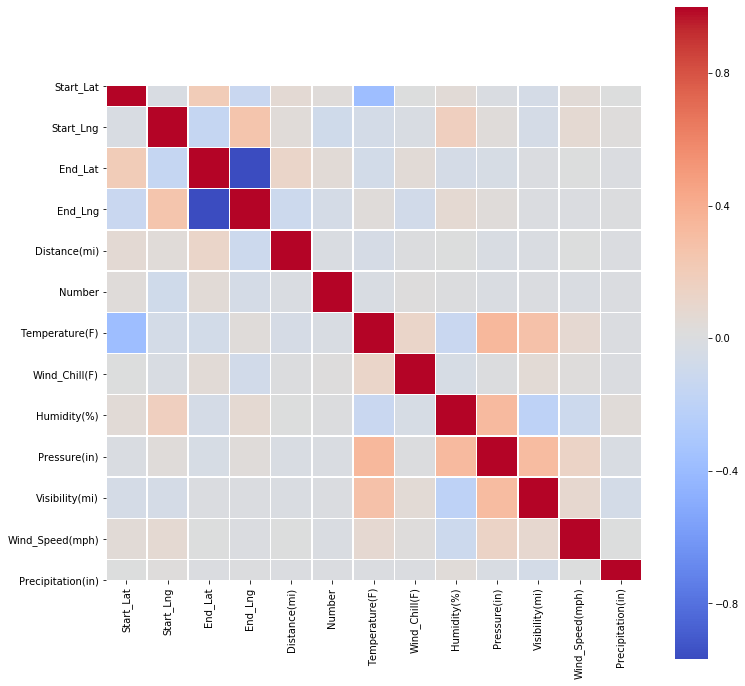

In [19]:
corr = data.corr()
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corr, 
            cbar = True,  
            square = True, 
            annot = False, 
            fmt = '.1f', 
            xticklabels = True, 
            yticklabels = True, 
            cmap = "coolwarm", 
            linewidths = .5, 
            ax = ax)

In [20]:
test_size = 0.30
seed = 5436
x_train, x_test = train_test_split(data, test_size= test_size, random_state=seed, shuffle=True)

In [21]:
x_train.shape, x_test.shape

((416406, 29), (178461, 29))

In [22]:
y_train, y_test = train_test_split(depVar, test_size= test_size, random_state=seed, shuffle=True)

In [23]:
y_train.shape, y_test.shape

((416406,), (178461,))

In [24]:
modelSVC = SVC(C=1.0, 
               #cache_size=400, 
               degree=3,
               gamma='scale',
               verbose=True)

modelRFC = RandomForestClassifier(bootstrap=True, 
                                 max_depth=10, 
                                 max_features='auto', 
                                 n_estimators=10, 
                                 n_jobs=10)

modelGBM = GradientBoostingClassifier(max_depth=2, 
                                      n_estimators=100,
                                      verbose=1)



In [25]:
#Random Forest

modelRFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
#Metricas Random Forest

print(cross_val_score(modelRFC, x_train, y_train)) 
print(modelRFC.score(x_train, y_train))

C:\Users\alvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.99998559 0.99997839 1.        ]
1.0


In [27]:
#Gradient Boosting Model

modelGBM.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1      400212.6642            6.22m
         2      328477.0840            6.56m
         3      274094.3205            6.63m
         4      231312.6077            6.60m
         5      191372.4732            6.56m


KeyboardInterrupt: 

In [ ]:
#Metricas Linear Classifier
print(cross_val_score(modelGBM, x_train, y_train)) 
print(modelGBM.score(x_train, y_train))

In [ ]:
#SVC

##Este modelo no devolvio resultados despues de casi 12 horas de procesamiento por lo que queda excluido.

#modelSVC.fit(x_train,y_train)

In [ ]:
#Metricas Support Vector Cassifier

#print(cross_val_score(modelSVC, x_train, y_train)) 
#print(modelSVC.score(x_train, y_train))

In [ ]:
#Prediciones con RFC
predictions = modelRFC.predict(x_test)

In [ ]:
accurancy = accuracy_score(y_test, predictions)
#precision = precision_score(y_test, predictions)
#score = recall_score(y_test, predictions)

In [ ]:
print('accurancy: %.3f' % accurancy)
print('Precision: %.3f' % precision)
print('score: %.3f' % score)

In [ ]:
#Prediciones con SVC
#predictions = modelSVC.predict(x_test)

In [ ]:
#accurancy = accuracy_score(y_test, predictions)
#precision = precision_score(y_test, predictions)
#score = recall_score(y_test, predictions)

In [ ]:
#print('accurancy: %.3f' % accurancy)
#print('Precision: %.3f' % precision)
#print('score: %.3f' % score)

In [ ]:
#Prediciones con GBM
predictions = modelGBM.predict(x_test)

In [ ]:
accurancy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

In [ ]:
print('accurancy: %.3f' % accurancy)
print('Precision: %.3f' % precision)
print('score: %.3f' % score)

In [28]:
# Cantidad de accidentes por estado

states = accidentData.State.unique()

count_by_state=[]
for i in accidentData.State.unique():
    count_by_state.append(accidentData[accidentData['State']==i].count()['ID'])

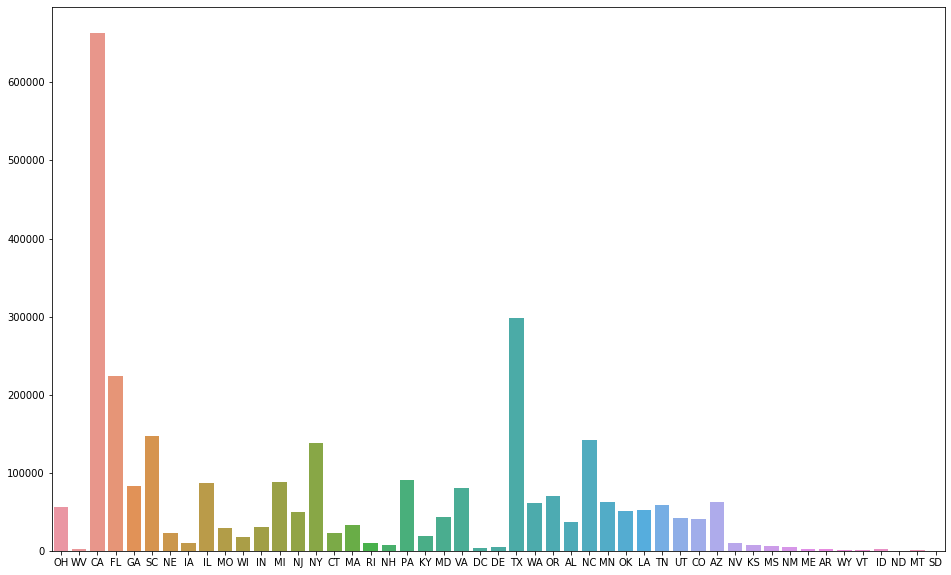

In [29]:
plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

C:\Users\alvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


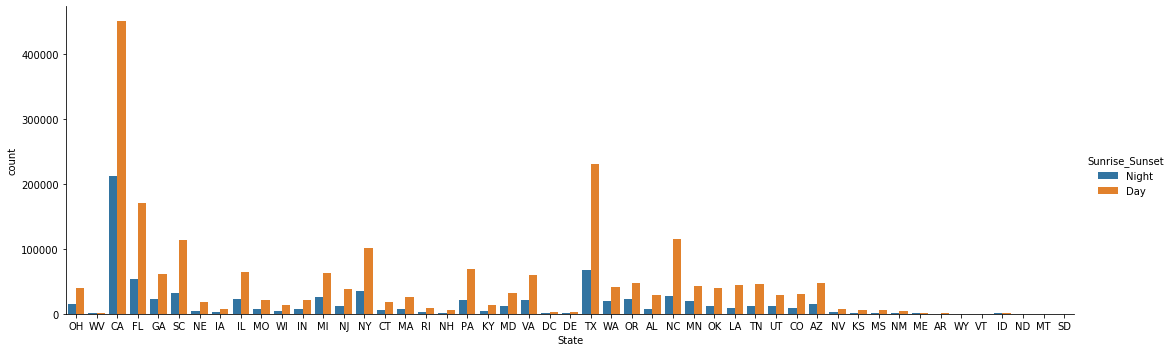

In [30]:
sns.factorplot('State', data=accidentData, hue='Sunrise_Sunset', kind='count', aspect=3)

In [31]:
table = pd.crosstab(index=[accidentData.Weather_Condition, accidentData.Severity], columns=[accidentData.Sunrise_Sunset])
table.unstack()

Sunrise_Sunset          Day                    Night                  
Severity                  1      2     3     4     1      2     3    4
Weather_Condition                                                     
Blowing Dust            NaN   30.0   4.0   NaN   NaN   10.0   0.0  NaN
Blowing Dust / Windy    NaN   55.0   4.0   1.0   NaN    3.0   1.0  0.0
Blowing Sand            NaN    NaN   1.0   NaN   NaN    NaN   0.0  NaN
Blowing Snow            NaN   87.0  90.0  20.0   NaN   34.0  29.0  8.0
Blowing Snow / Windy    NaN    5.0   4.0   NaN   NaN    1.0   0.0  NaN
...                      ..    ...   ...   ...   ...    ...   ...  ...
Volcanic Ash            NaN   17.0   2.0   NaN   NaN    3.0   0.0  NaN
Widespread Dust         NaN   93.0  15.0   1.0   NaN   14.0   5.0  1.0
Widespread Dust / Windy NaN    NaN   1.0   NaN   NaN    NaN   0.0  NaN
Wintry Mix              NaN  282.0  98.0  11.0   NaN  322.0  77.0  9.0
Wintry Mix / Windy      NaN    4.0  12.0   0.0   NaN    1.0   2.0  1.0

[120 rows x 8 columns]

In [32]:
#Severidad del accindente por cada estado

severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(accidentData[(accidentData['Severity']==1)&(accidentData['State']==i)].count()['ID'])
    severity_2_by_state.append(accidentData[(accidentData['Severity']==2)&(accidentData['State']==i)].count()['ID'])
    severity_3_by_state.append(accidentData[(accidentData['Severity']==3)&(accidentData['State']==i)].count()['ID'])
    severity_4_by_state.append(accidentData[(accidentData['Severity']==4)&(accidentData['State']==i)].count()['ID'])



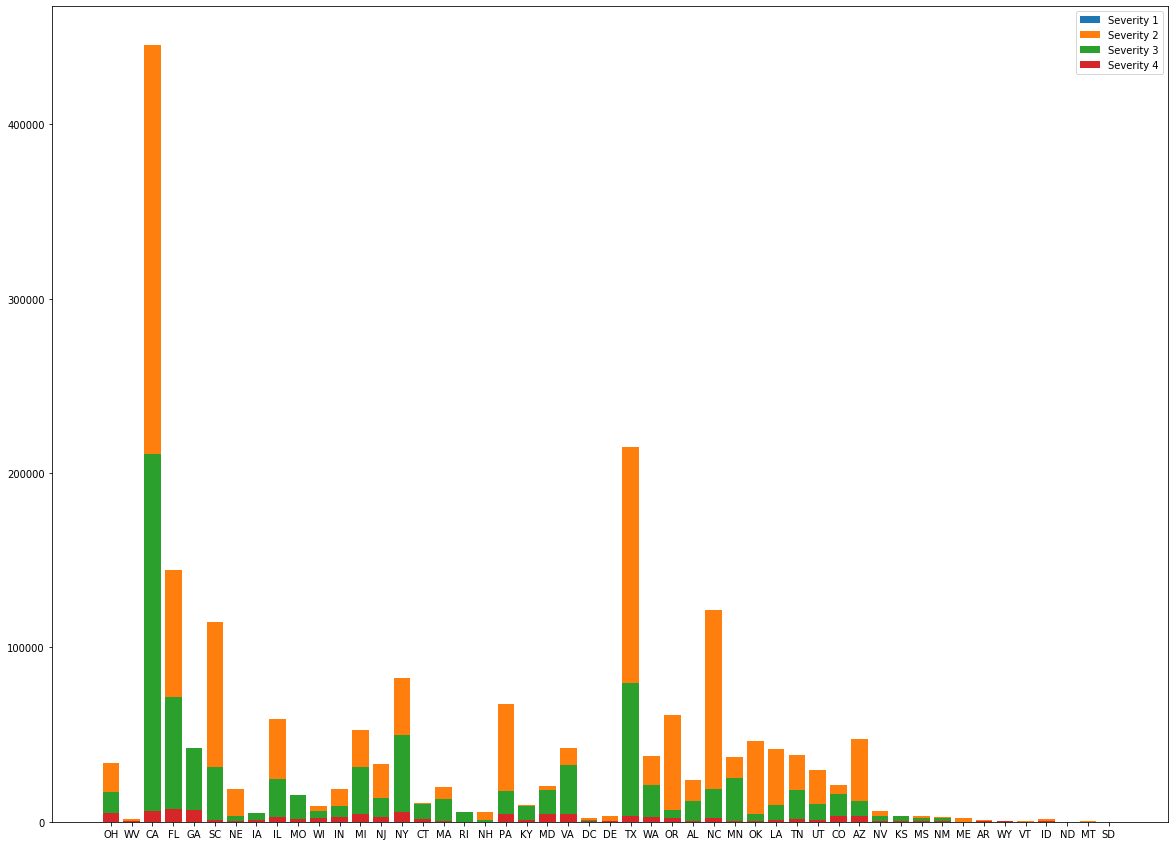

In [33]:
plt.figure(figsize=(20,15))

plt.bar(states, severity_1_by_state, label='Severity 1')
plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')

plt.legend()

In [34]:
#Relacion entre temperatura y severidad de los accidentes

Temperature = accidentData['Temperature(F)']
Severity_1_data = accidentData[accidentData['Severity']==1]['Temperature(F)'].mean()
Severity_2_data = accidentData[accidentData['Severity']==2]['Temperature(F)'].mean()
Severity_3_data = accidentData[accidentData['Severity']==3]['Temperature(F)'].mean()
Severity_4_data = accidentData[accidentData['Severity']==4]['Temperature(F)'].mean()
Severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

Mean_temp_by_severity = [Severity_1_data, Severity_2_data, Severity_3_data, Severity_4_data]

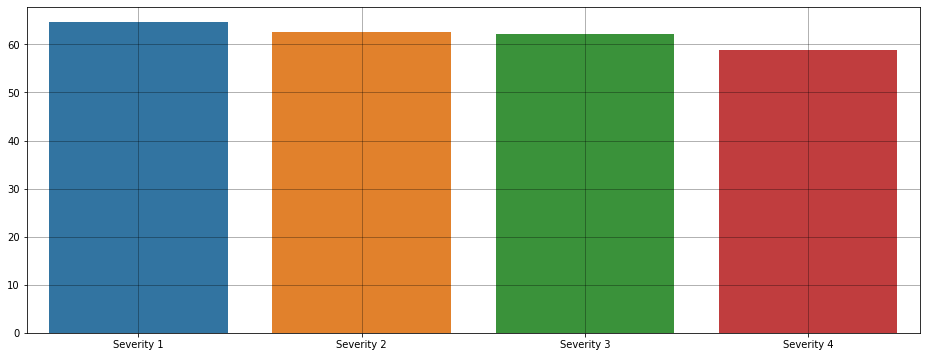

In [35]:
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)

In [36]:
# Hora en a que suceden mas accidentes en USA

type(accidentData["Start_Time"][1])

str

In [37]:
dt_object = accidentData["Start_Time"][1:30].apply(lambda x: dateutil.parser.parse(x))

In [38]:
accidentData["Time_added"] = accidentData["Start_Time"].apply(lambda x: dateutil.parser.parse(x))

In [39]:
accidentData["Time_added"][0:4].apply(lambda timestamp: timestamp.hour)

0    5
1    6
2    6
3    7
Name: Time_added, dtype: int64

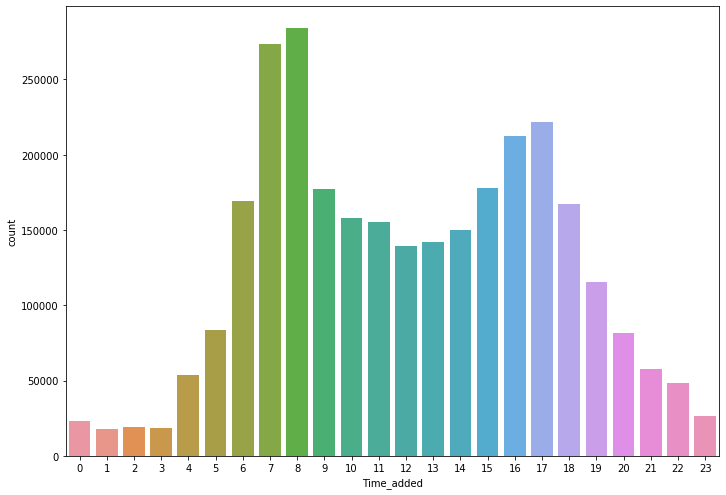

In [40]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x=accidentData["Time_added"].apply(lambda timestamp: timestamp.hour))

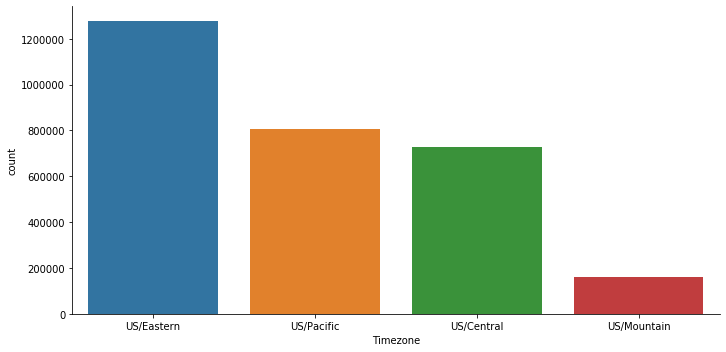

In [41]:
# Cantidad de accidentes por zona horaria

sns.factorplot('Timezone', data = accidentData, kind='count', aspect=2)

In [42]:
# Accidentes por ano

accidentData['Start_Time']= pd.to_datetime(accidentData['Start_Time'])
accidentData['hour']= accidentData['Start_Time'].dt.hour
accidentData['year']= accidentData['Start_Time'].dt.year
accidentData['month']= accidentData['Start_Time'].dt.month
accidentData['week']= accidentData['Start_Time'].dt.week
accidentData['day']= accidentData['Start_Time'].dt.weekday_name
accidentData['quarter']= accidentData['Start_Time'].dt.quarter
accidentData['time_zone']= accidentData['Start_Time'].dt.tz
accidentData['time']= accidentData['Start_Time'].dt.time

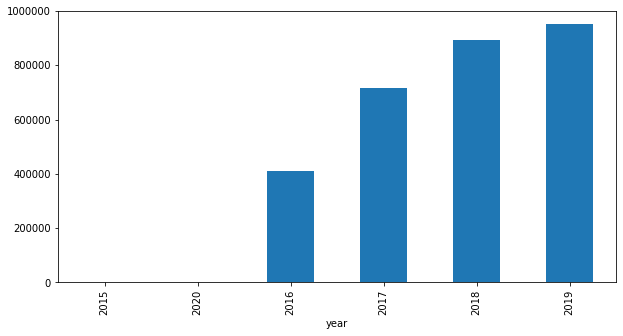

In [43]:
plt.figure(figsize =(10,5))
accidentData.groupby(['year']).size().sort_values(ascending=True).plot.bar()

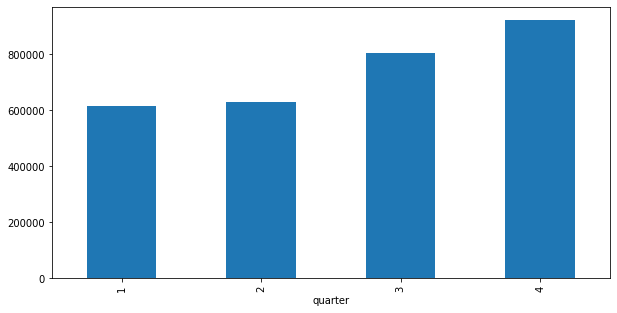

In [44]:
plt.figure(figsize =(10,5))
accidentData.groupby(['quarter']).size().sort_values(ascending=True).plot.bar()